# Introduction to ODE

- The `problems` python module implements the second part of the autonomous form of 3 ordinary differential equations.
- The `methods` python module implements 2 one-step explicit methods to solve these equations.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from problems import LoktaVolterra, Michell_Schaeffer, Exponential
from methods import EulerExplicite, RungeKutta4

## Solver

The `getSol` function solves with the method `method` a problem `problem` defined by the initial condition `Y0` and additional parameters `params`, the independant variable being defined in [0,`Tmax`].
Let's consider our problem as a system of $d$ ordinary differential equations. Then $Y_0\in\mathbb{R}^d$ and $Y(t)\in\mathbb{R}^d,\, \forall t\in [0,T_{max}]$.

$$\left\{\begin{array}{rlc}
\dot{Y} &=& f(t, Y(t))\\
Y(0)&=&Y_0
\end{array}\right.$$

In this problem, the function $f$ encodes the `problem` and the `params`.

In the discrete world, the solution $Y(t)$ is approximated at $n$ points $t_i$ such as $t_i = t_0+i\cdot h$ (here $t_0=0$). Let's call $T=[(t_i)_{0\leq i\leq n}]^T=\left[0, ..., t_i, ..., t_n=T_{max}=n\cdot h\right]^T \in \mathbb{R}^n$ the vector containing these points.

The value of the solution $Y(t)$ is stored at each point $t_i$ such as $Y(t_i)=Y_i \in \mathbb{R}^d$. So we have $Y\in\mathcal{M}_{n,d}(\mathbb{R})$.


In [13]:
def getSol(Y0, Tmax, n, problem, method, params):
    # Define discretization parameters (number and size of elements)
    T = np.linspace(0, Tmax, n)
    h = Tmax / n
    print(f"{problem.__name__} with {method.__name__}:\t h={h}, {n} elements between 0 and {Tmax}.\tY0={Y0}.")

    # Initialize the solution vector
    Y = np.empty((n, len(Y0)))
    Y[0, :] = Y0  # Condition initiale

    # Start the loop: compute the solution at step t + dt
    for i in range(n - 1):
        Y[i + 1, :] = method(T[i], Y[i, :], h, problem, params)

    return T, Y

## Exponential

The idea is to validate our implementation on a simple case. Let's try to solve $\frac{dy}{dx} = k\cdot y$.

- Implement the problem in the module `problems.py`, in function `Exponential(t, y, k)`
- Compute the exact solution and implement it. Store values in `Y_exact`. `Y_exact` and `T` must have the same lenght.


In [19]:
# Time discretization
Tmax, n = 1, 20
# Problem to solve
problem = Exponential
# Initial consition
y0 = [1]
# Parameters
params = [1.65]

Exponential with EulerExplicite:	 h=0.05, 20 elements between 0 and 1.	Y0=[1].
Exponential with RungeKutta4:	 h=0.05, 20 elements between 0 and 1.	Y0=[1].


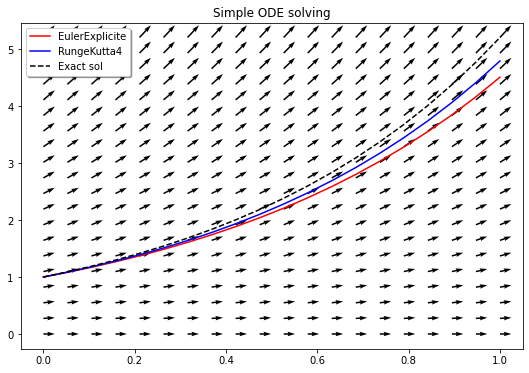

In [20]:
# Solve the EDO with both methods
T, Y_e = getSol(y0, Tmax, n, problem=problem, params=params, method=EulerExplicite)
T, Y_r = getSol(y0, Tmax, n, problem=problem, params=params, method=RungeKutta4)

# Compute the exact solution
Y_exact = y0*np.exp(params[0] * T)

# Plot
plt.figure(figsize=(9, 6))

plt.plot(T, Y_e, "r-", label="EulerExplicite")
plt.plot(T, Y_r, "b-", label="RungeKutta4")

plt.plot(T, Y_exact, "k--", label="Exact sol")
plt.legend(shadow=True, loc="upper left")
plt.title("Simple ODE solving")

# Champ de directions
X, Y = np.meshgrid(np.linspace(0, Tmax, 20), np.linspace(0, np.max(Y_exact), 20))
U, V = np.ones_like(X), problem(X, Y, *params)
plt.quiver(X, Y, U, V, angles="xy", scale=40, scale_units="xy")

plt.show()

### Global approximation error

Compute the $|.|_{L_2}$ error between exact and computed solutions.

Exponential with EulerExplicite:	 h=0.1, 10 elements between 0 and 1.	Y0=[1].
Exponential with RungeKutta4:	 h=0.1, 10 elements between 0 and 1.	Y0=[1].
Exponential with EulerExplicite:	 h=0.016666666666666666, 60 elements between 0 and 1.	Y0=[1].
Exponential with RungeKutta4:	 h=0.016666666666666666, 60 elements between 0 and 1.	Y0=[1].
Exponential with EulerExplicite:	 h=0.00909090909090909, 110 elements between 0 and 1.	Y0=[1].
Exponential with RungeKutta4:	 h=0.00909090909090909, 110 elements between 0 and 1.	Y0=[1].
Exponential with EulerExplicite:	 h=0.00625, 160 elements between 0 and 1.	Y0=[1].
Exponential with RungeKutta4:	 h=0.00625, 160 elements between 0 and 1.	Y0=[1].
Exponential with EulerExplicite:	 h=0.004761904761904762, 210 elements between 0 and 1.	Y0=[1].
Exponential with RungeKutta4:	 h=0.004761904761904762, 210 elements between 0 and 1.	Y0=[1].
Exponential with EulerExplicite:	 h=0.0038461538461538464, 260 elements between 0 and 1.	Y0=[1].
Exponential with RungeKu

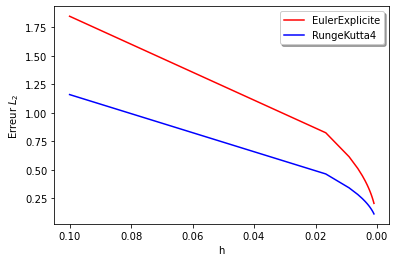

In [21]:
def error(y1, y2):
    # Norm L2 of the error between y1 and y2
    return np.sqrt(np.sum(np.square(y1-y2)))

errors = []
for n in range(10, 1011, 50):
    T, Y_e = getSol(y0, Tmax, n, problem=problem, params=params, method=EulerExplicite)
    T, Y_r = getSol(y0, Tmax, n, problem=problem, params=params, method=RungeKutta4)
    Y_exacte = np.exp(params[0] * T)
    errors.append([Tmax/n, error(np.squeeze(Y_e), Y_exacte), error(np.squeeze(Y_r), Y_exacte)])

errors = np.asarray(errors)
plt.plot(errors[:,0], errors[:,1], "r-", label="EulerExplicite")
plt.plot(errors[:,0], errors[:,2], "b-", label="RungeKutta4")
plt.legend(shadow=True)
plt.xlabel("h")
plt.ylabel("Erreur $L_2$")
plt.gca().invert_xaxis()
plt.show()

## Lokta-Volterra

- Implement the problem in the module `problems.py`, in the function `LoktaVolterra(t, y, k1, k2, a1, a2)`

$$\left\{\begin{array}{rcl}
\frac{dx}{dt}&=&a_1 x\left(1-\frac{y}{k_2}\right)\\
\frac{dy}{dt}&=&-a_2 y\left(1-\frac{x}{k_1}\right)
\end{array}\right.$$

In [124]:
# Time discretization
Tmax, n = 100, 1000
# Problem to solve
problem = LoktaVolterra
# Initial consition
y0 = [10, 1]
# Parameters
params = [1, 1, 1, 0.2]

LoktaVolterra with EulerExplicite:	 h=0.1, 1000 elements between 0 and 100.	Y0=[10, 1].
LoktaVolterra with RungeKutta4:	 h=0.1, 1000 elements between 0 and 100.	Y0=[10, 1].


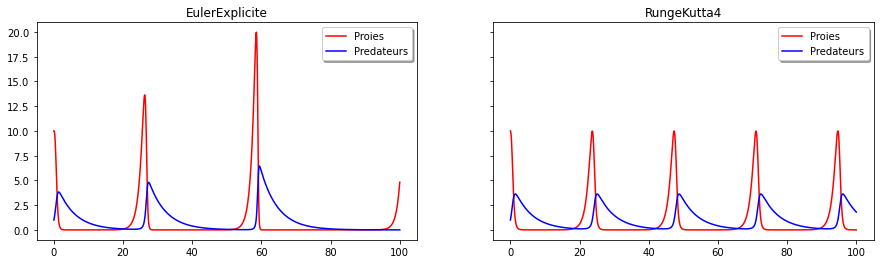

In [125]:
# Plot
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(15, 4))

for ax, method in zip(axs, [EulerExplicite, RungeKutta4]):
    T, Y = getSol(y0, Tmax, n, method=method, problem=problem, params=params)
    ax.plot(T, Y[:, 0], "r-")
    ax.plot(T, Y[:, 1], "b-")
    ax.set_title(method.__name__)
    ax.legend(["Proies", "Predateurs"], shadow=True, loc="upper right")

plt.show()

LoktaVolterra with EulerExplicite:	 h=0.1, 1000 elements between 0 and 100.	Y0=[10, 1].
LoktaVolterra with RungeKutta4:	 h=0.1, 1000 elements between 0 and 100.	Y0=[10, 1].


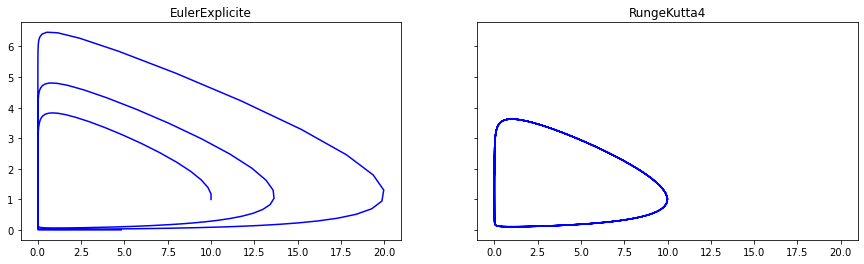

In [128]:
# Plot
fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(15, 4))

for ax, method in zip(axs, [EulerExplicite, RungeKutta4]):
    T, Y = getSol(y0, Tmax, n, method=method, problem=problem, params=params)
    ax.plot(Y[:, 0], Y[:, 1], "b-")
    ax.set_title(method.__name__)

plt.show()

## Mitchell-Schaffer

- Implement the problem in the module `problems.py`, in the function `Michell_Schaeffer(t, y, tin, tout, topen, tclose, vgate, JStim, T_stim)`. The `JStim` function is given below.

In [22]:
# Time discretization
Tmax, n = 500, 500
# Problem to solve
problem = Michell_Schaeffer
# Initial consition
y0 = [0, 1]

# Stimulation
t_stim, vstim = 0.1, 1
def periodic_stimulation(t, T_stim):
    return vstim if 0 <= t % T_stim <= t_stim else 0

# Parameters
params = [0.3, 6, 120, 150, 0.13, periodic_stimulation, 500]

Michell_Schaeffer with EulerExplicite:	 h=1.0, 500 elements between 0 and 500.	Y0=[0, 1].
Michell_Schaeffer with RungeKutta4:	 h=1.0, 500 elements between 0 and 500.	Y0=[0, 1].


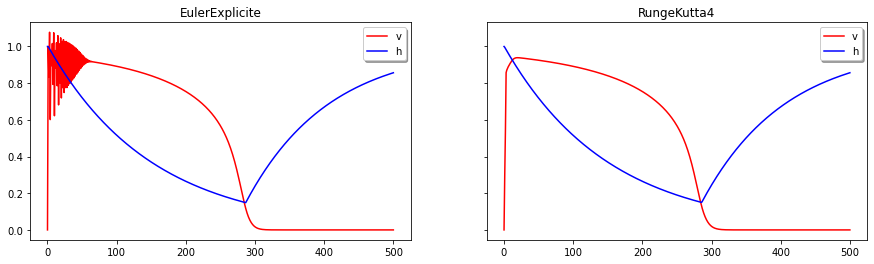

In [23]:
# Plot
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(15, 4))

for ax, method in zip(axs, [EulerExplicite, RungeKutta4]):
    T, Y = getSol(y0, Tmax, n, method=method, problem=problem, params=params)
    ax.plot(T, Y[:, 0], "r-")
    ax.plot(T, Y[:, 1], "b-")
    ax.set_title(method.__name__)
    ax.legend(["v", "h"], shadow=True, loc="upper right")

plt.show()

## Solve with scipy

See [the doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html).

In [24]:
from scipy.integrate import solve_ivp

# Time discretization
Tmax = 500
# Problem to solve
problem = Michell_Schaeffer
# Initial consition
y0 = [0, 1]

# Stimulation
t_stim, vstim = 0.1, 1
def periodic_stimulation(t, T_stim):
    return vstim if 0 <= t % T_stim <= t_stim else 0

# Parameters
params = [0.3, 6, 120, 150, 0.13, periodic_stimulation, 500]

- Implement the `solve_ivp` method and plot the solution.

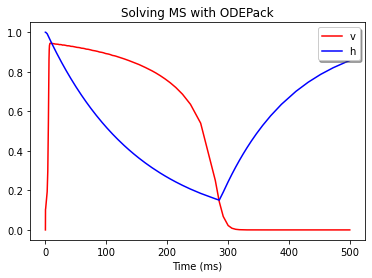

In [25]:
sol = solve_ivp(problem, (0, Tmax), y0, args=params)

# Plot
plt.plot(sol.t, sol.y[0,:], 'r-', label="v")
plt.plot(sol.t, sol.y[1,:], 'b-', label="h")
plt.title("Solving MS with ODEPack")
plt.xlabel("Time (ms)")
plt.legend(shadow=True, loc="upper right")
plt.show()

Same thing with `dense_output` enabled.

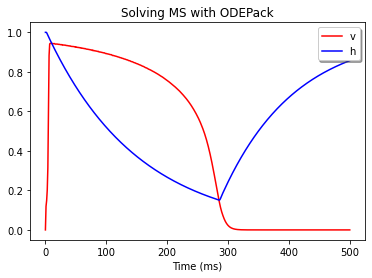

In [26]:
sol = solve_ivp(problem, (0, Tmax), y0, args=params, dense_output=True)

T = np.linspace(0, Tmax, Tmax)
Y = sol.sol(T)

# Plot
plt.plot(T, Y[0,:], 'r-', label="v")
plt.plot(T, Y[1,:], 'b-', label="h")
plt.title("Solving MS with ODEPack")
plt.xlabel("Time (ms)")
plt.legend(shadow=True, loc="upper right")
plt.show()

With $T_{max}=2.5s$ and $T_{stim}=0.4s$, plot a series of activations.

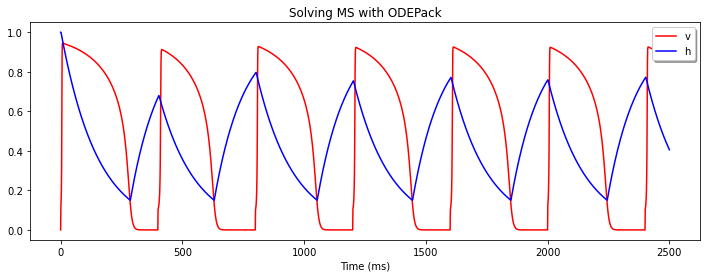

In [27]:
# Time discretization
Tmax = 2500
# Parameters
params = [0.3, 6, 120, 150, 0.13, periodic_stimulation, 400]

sol = solve_ivp(problem, (0, Tmax), y0, args=params, dense_output=True, max_step=0.5)

T = np.linspace(0, Tmax, Tmax)
Y = sol.sol(T)

# Plot
plt.figure(figsize=(12, 4))
plt.plot(T, Y[0,:], 'r-', label="v")
plt.plot(T, Y[1,:], 'b-', label="h")
plt.title("Solving MS with ODEPack")
plt.xlabel("Time (ms)")
plt.legend(shadow=True, loc="upper right")
plt.show()

Set $T_{max}=1.2s$ and plot a sequence of activations, decreasing the stiimulation period from 500ms to 200ms.

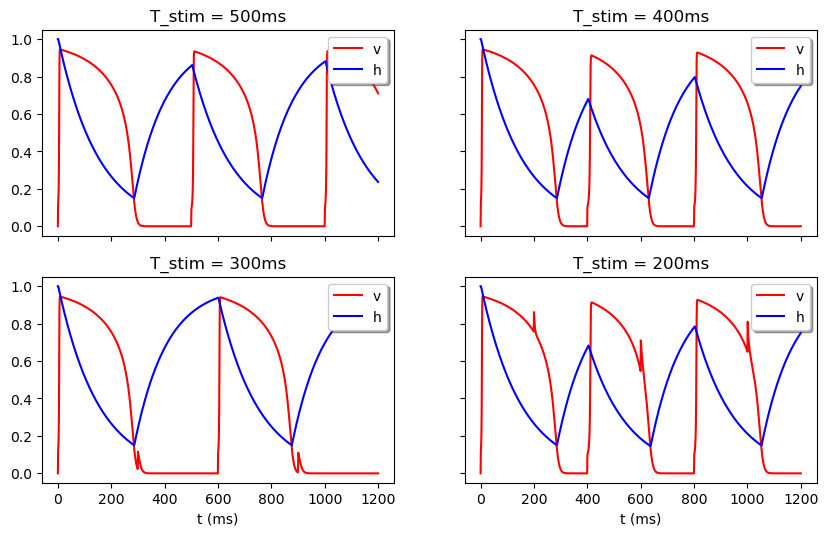

In [28]:
Tmax = 1200
T = np.linspace(0, Tmax, Tmax)

# Let's define a list of periods
T_stims = range(500, 100, -100)

def getY(T_stim):
    params[-1] = T_stim
    sol = solve_ivp(problem, (0, Tmax), y0, args=params, dense_output=True, max_step=0.5)
    y = sol.sol(T)
    return y.T

# Plot
fig, axs = plt.subplots(2, 2, figsize=(10,6), dpi=100)
for ax,t in zip(axs.flat, T_stims):
    Y = getY(t)
    ax.plot(T, Y[:, 0], "r-", label="v")
    ax.plot(T, Y[:, 1], "b-", label="h")
    ax.legend(shadow=True, loc="upper right")
    ax.set_title(f"T_stim = {t}ms")
    ax.set(xlabel='t (ms)')
    ax.label_outer()